# Predicting Heart disease using Machine Learning




This notebook looks into various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has Heart-disease on their medical attributes.

We are going to take the following approach:

1. problem definition
2. Data
3. Evaluavation
4. Features
5. Modelling
6. Experimentations

   

## Problem defenition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?


## 2.Data


The original data came from the cleavland data from the UCI Machine Learning

## 3.Evaluation 
> If we can reach 95% accuracy at predicting whether a patient has heart disease or not during the proof of concept, we will pursue the project.

## 4.Features


This is where you will get different information about each of your features in your data. 

**Create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
      -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

# Preparation

In [63]:
# Import all the tools we need 

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration( exploratory data analysis or EDA)

The goal here is to find more about the data and become a subject matter expert on the dataset you are working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different tyopes?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get out more from your data?

In [4]:
# Let's find out how many of each class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

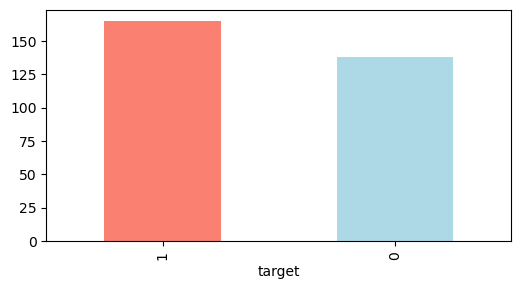

In [18]:
df.target.value_counts().plot(kind = "bar", color=("salmon","lightblue"), figsize = (6,3) )
plt.show()

# from the bar when can see it there are more "MENS" than the females.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

# Has no missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart disease Frequency according to sex

In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


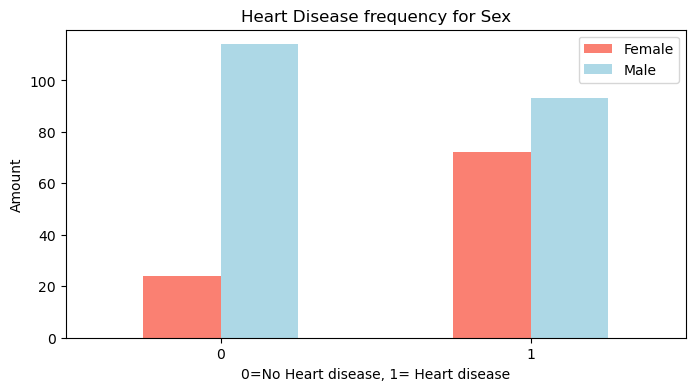

In [28]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize= (8,4),
                                    color = ("salmon", "lightblue"))

plt.title("Heart Disease frequency for Sex")
plt.xlabel("0=No Heart disease, 1= Heart disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0) #for the "0" & "1" to be straight in the x-axis 
plt.show()

In [31]:
df.thalach.value_counts()

# The " Lenght:91 " refers to 91 different types of values in the "thalach"--column and
# This cannot be seen in a bar graph as there are 96 diff bar values, this is where the "SACTTER PLOT" types plots are used.
    

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs. Max Heart Rate for Heart Disease

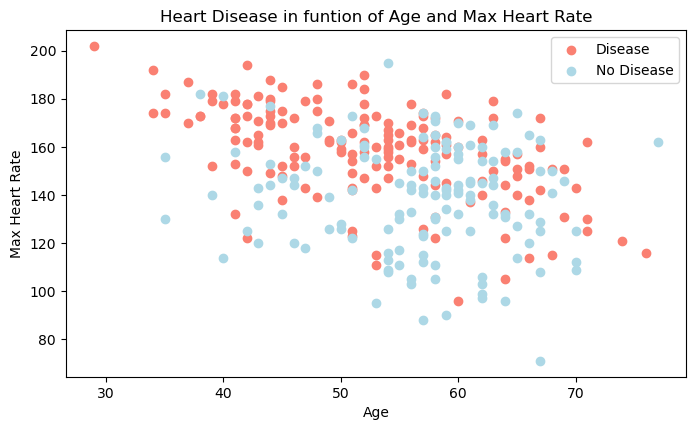

In [12]:
# Create another figure
plt.figure(figsize=(8,4.5))

# Scatter with positive example ( target==1 )
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= "salmon")

# Scatter with negative example ( target==0 )
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c= "lightblue")

# Add some helpful info
plt.title("Heart Disease in funtion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

plt.show()

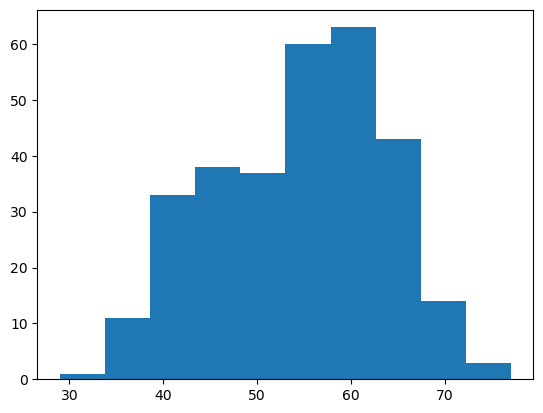

In [17]:
# The the distribution of the Age column with Histogram

plt.hist(df.age);
plt.show()

#-- Looks like a normal distribution --#

## Heart Disease Frequency per Chest Pain Type

In [18]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


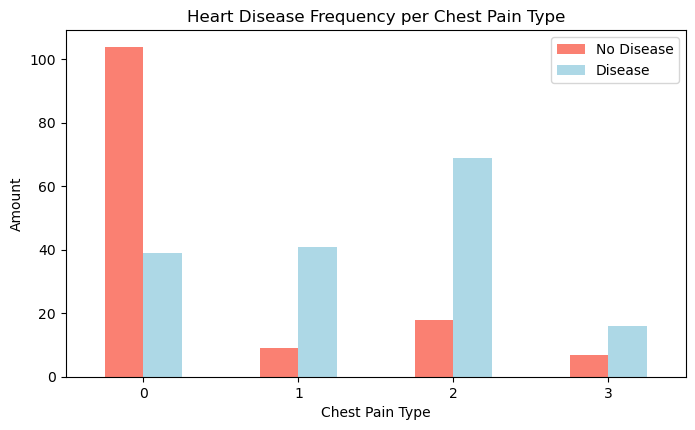

In [23]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(8,4.5),
                                  color = ["salmon","lightblue"])

# Add some communications
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

In [24]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


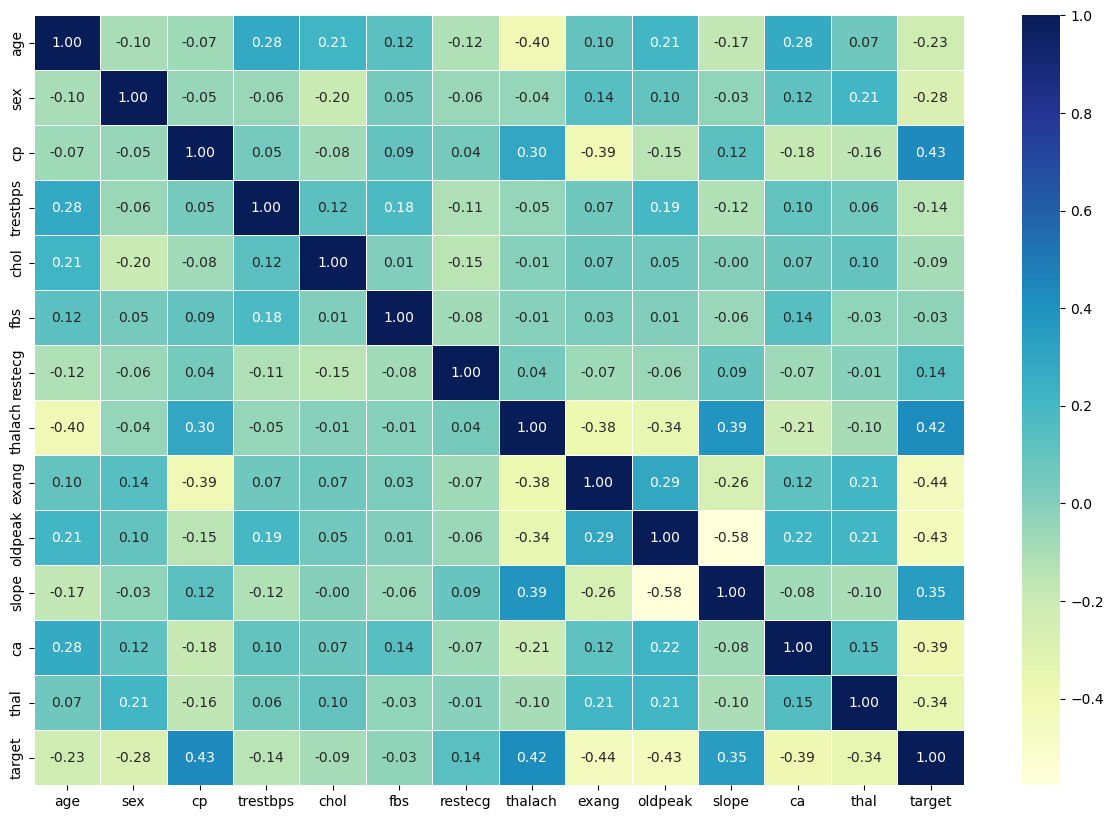

In [32]:
# Lets make our correlation matrix more pretty
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
           annot = True,
           linewidths = 0.5,
           fmt = ".2f",
            cmap="YlGnBu")
plt.show()

# -- google and see how colleration matrix is useful --#

# Modeling

In [33]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
# SPlit data into X and Y
x = df.drop("target", axis=1)
y = df["target"]

# Split Train and Test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)



We are going to try 3 different Machine Learning Models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [10]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier() }

# Create function to Fit and Score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-learn machine learning models.
    x_train : training data(no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    #set random seed
    np.random.seed(42)
    #Make dict to keep model scores
    model_scores = {}
    # Loop through models
    
    for name, model in models.items():
        #Fit the model to the data
        model.fit(x_train, y_train)
        # Score the models
        model_scores[name]= model.score(x_test, y_test)
    return model_scores
        
    


In [11]:
model_score = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_score

C:\Users\mdkhi\OneDrive\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

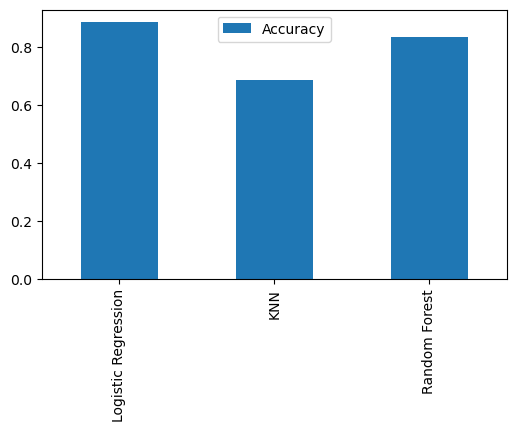

In [22]:
# Model Comparison
model_compare = pd.DataFrame(model_score, index=["Accuracy"])

model_compare.T.plot.bar(figsize=(6,3.5))  #using "T."plot is for having good looking bars separated.(to_find-try and see without "T" to understand)
plt.show()


Let's looks at the following parameters:

* Hyperparameter tuning.
* Feature importance
* Confusion Matrix
* Cross-Validation
* Percision
* Recall
* Classification report
* ROC curve
* Area Under Curve(AUC)

## Hyperparamter Tuning 

In [24]:
# Let's tune KNN 

train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set-up KNN instance
knn = KNeighborsClassifier()

# Loop trough different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(x_train, y_train)

    #Update the train score list
    train_score.append(knn.score(x_train, y_train))

    #Update the test score list
    test_score.append(knn.score(x_test, y_test))


In [25]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

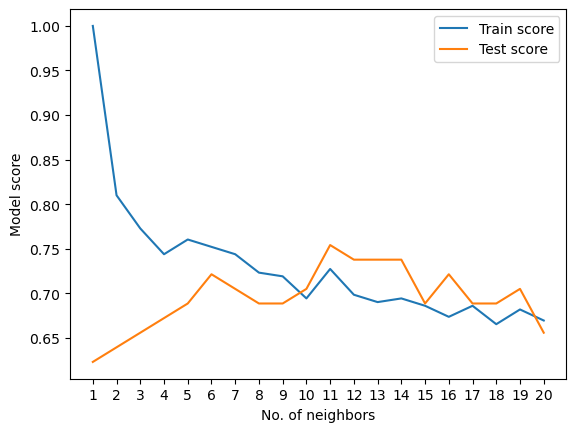

The maximum KNN score on the test Data: 75.41%


In [53]:
# Lets make this visualize 
plt.plot(neighbors, train_score)
plt.plot(neighbors, test_score)
plt.xlabel("No. of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))
plt.legend(["Train score", "Test score"])
plt.show()

print(f"The maximum KNN score on the test Data: {max(test_score)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:

* LogisticsRegression()
* RandomForestClassifier()

In [60]:
# Create hyperparamter grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4, 4 , 20),
                "solver" : ["liblinear"]}

# Create Hyperparamter grid for RandomForestClassifier

rf_grid =  {"n_estimators" : np.arange(10,1000, 50),
             "max_depth" : [None, 3, 5, 10],
             "min_samples_split" : np.arange(2,20, 2),
             "min_samples_leaf" : np.arange(1,20, 2)}
    


In [61]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random Hyperparameter search model for LogesticRgression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter= 20,
                                verbose=True)

# Fit this model
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [62]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

After LogesticRegression()....Now let's tune for RandomForestClassifier()

In [68]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv=5,
                           n_iter= 20,
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [69]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [70]:
rs_rf.score(x_test, y_test)

0.8688524590163934

In [71]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparamter tuning with GridsearchCV

Since LogesticRegression model provides the best score so far,
We'll try and improve them again using GridSearchCV...

In [6]:
# Different hyperparameters for our LogesticRegression model

log_reg_grid = {"C" : np.logspace(-4,4, 30),
           "solver" : ["liblinear"]}

# Setup grid hyperparamter for LogesticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          error_score="raise",
                          verbose=True)

# Fit the model in GridSearchCV
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [80]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [84]:
import sklearn
sklearn.__version__

'1.5.1'

## Evaluating our tuned Machine Learning Classifier, beyond accuracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Percision
* Recall
* F1-Score

...and it would be great if cross-validation was used where possible. 

To make comparison and eveluate our trained model, First we need to make the predictions

In [5]:
# Make predictions with the tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

NameError: name 'gs_log_reg' is not defined

In [174]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

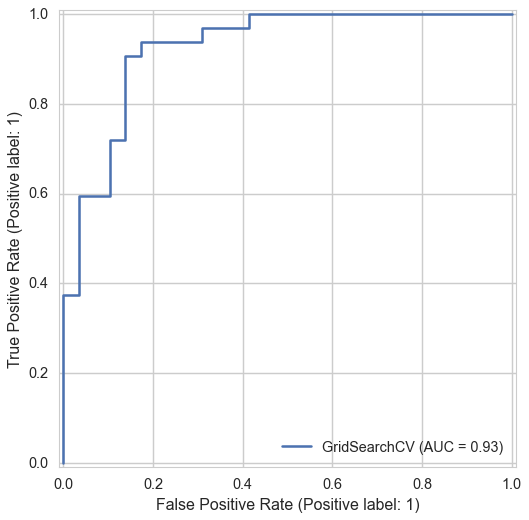

In [199]:
# Import RocCurveDisplay funtion from sklearn.metrics module(already done in preparations)

# Plot ROC curve and calculate and calculate AUC metrics

RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

plt.show()

**Confusion Matrix**

In [162]:
# Confusion Matrix

print(confusion_matrix(y_test, y_preds) )

[[25  4]
 [ 3 29]]


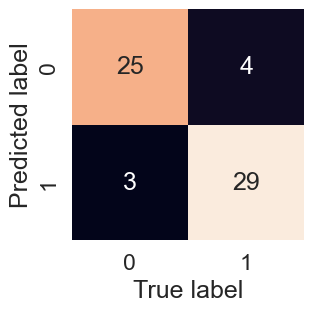

In [188]:
# More visualizing
sns.set(font_scale= 1.5)

def plot_con_mat(y_test, y_preds):
    """
    plots a nice confusion_matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_con_mat(y_test,y_preds)
plt.show()

In [202]:
# Classification report

print(classification_report(y_test, y_preds))

# This below score is only calculated on one split of test score(that_is--  last 20% of data as x_test and y_test and not cross_validated) .

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evaluation metrics using cross-validation

We are going to calculate precision, Recall and F1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [7]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [8]:
# create a new classifier with best parameters

clf = LogisticRegression(C=0.20433597178569418,
                         solver = "liblinear")


In [14]:
#cross-validated accuracy

cv_acc = cross_val_score(clf,
                         x,
                         y,
                        cv=5,
                        scoring = "accuracy")
cv_acc #we can take the mean of this

cv_acc =  np.mean(cv_acc)
cv_acc

0.8446994535519124

In [21]:
# cross-validated precision

cv_precision = cross_val_score(clf,
                         x,
                         y,
                        cv=5,
                        scoring = "precision")
cv_precision #we can take the mean of this

cv_precision =  np.mean(cv_precision)
cv_precision

0.8207936507936507

In [18]:
# cross-validated recall

cv_recall = cross_val_score(clf,
                         x,
                         y,
                        cv=5,
                        scoring = "recall")
cv_acc #we can take the mean of this

cv_recall =  np.mean(cv_recall)
cv_recall

0.9212121212121213

In [19]:
# cross-validated F1-score

cv_f1 = cross_val_score(clf,
                         x,
                         y,
                        cv=5,
                        scoring = "f1")
cv_acc #we can take the mean of this

cv_f1 =  np.mean(cv_f1)
cv_f1

0.8673007976269721

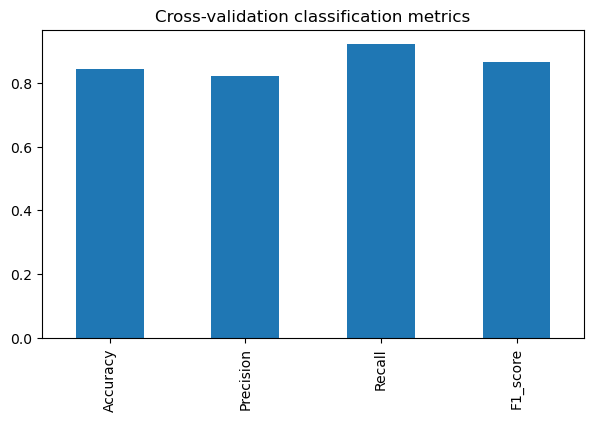

In [36]:
# Visualize cross-validation metrics

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1_score" : cv_f1}, index = [0])

cv_metrics.T.plot.bar(title= "Cross-validation classification metrics",
                      legend =False,
                     figsize= (7,4));

plt.show()

### Feature Importance 

Feature importance is another as asking " Which feature contributed most to the outcome of the model andhow did they contributed?"

Finding feature importance id different for each machine learning model(eg-`LogisticRegression()` model.


In [37]:
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


Lets find the feature importance for our LogisticRegression model...

In [40]:
# Fit an instance of LogisticsRegression
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                         solver= "liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [47]:
# Check coeff

clf.coef_    # This will give co-efficient of all features in the model.(like-- age, sex, ect...)

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [56]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])) )
feature_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

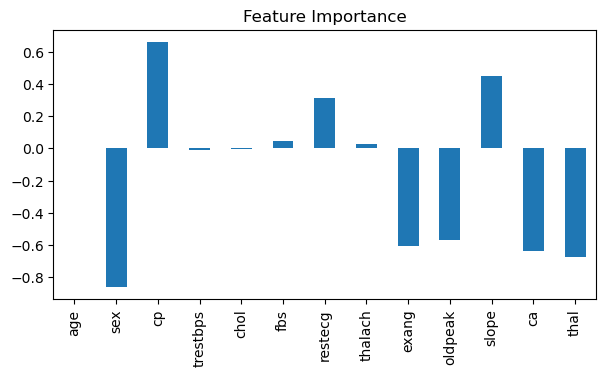

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot(kind="bar", title= "Feature Importance", legend= False,
                  figsize= (7,3.5))
plt.show()